In [58]:
import navis

n = navis.example_neurons(1, kind='skeleton')
print(n.soma)

array([4177], dtype=int32)

In [59]:
navis.reroot_skeleton(n, n.soma)

,
type,navis.TreeNeuron
name,1734350788
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,598
n_leafs,619
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [67]:
sk = navis.example_neurons(n=1, kind='skeleton')
print(sk.n_nodes)

4465

In [68]:
sk_downsampled = navis.downsample_neuron(sk, downsampling_factor=10, inplace=False)
print(sk_downsampled.n_nodes)

1304

In [69]:
me = navis.example_neurons(n=1, kind='mesh')
print(me.n_faces)

13054

In [70]:
me_downsampled = navis.downsample_neuron(me, downsampling_factor=10, inplace=False)
print(me_downsampled.n_faces)

1304

In [71]:
sk = navis.example_neurons(n=1, kind='skeleton')
print(sk.sampling_resolution)

59.681270996640535

In [72]:
# Note that we can provide a unit ("1 micron") here because our neuron has units set
sk_resampled = navis.resample_skeleton(sk, resample_to='1 micron', inplace=False)
print(sk_resampled.sampling_resolution * sk_resampled.units)

1072.2341923485653 <Unit('nanometer')>

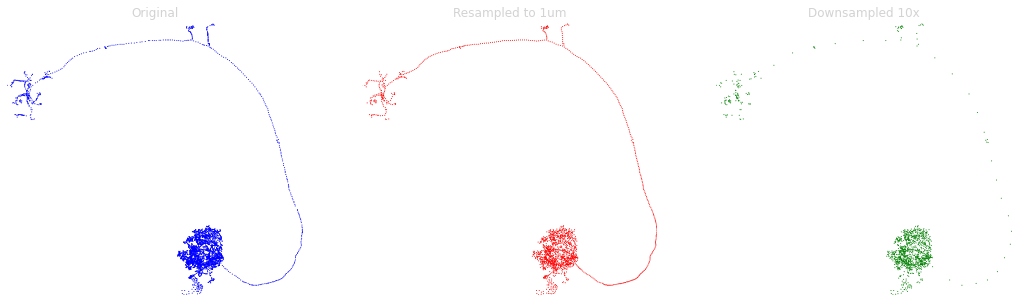

In [74]:
nodes_original = sk.nodes[['x', 'y' ,'z']].values 
nodes_downsampled = sk_downsampled.nodes[['x', 'y' ,'z']].values 
nodes_resampled = sk_resampled.nodes[['x', 'y' ,'z']].values 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

_ = navis.plot2d(nodes_original, method='2d', view=('x', '-z'), scatter_kws=dict(c='blue'), ax=axes[0])
_ = navis.plot2d(nodes_resampled, method='2d', view=('x', '-z'), scatter_kws=dict(c='red'), ax=axes[1])
_ = navis.plot2d(nodes_downsampled, method='2d', view=('x', '-z'), scatter_kws=dict(c='green'), ax=axes[2])

for ax, title in zip(axes, ['Original', 'Resampled to 1um', 'Downsampled 10x']):
    ax.set_title(title, color='lightgrey')
    ax.set_axis_off()

plt.show()

In [81]:
# smooth_skeleton uses a rolling window along the linear segments
sk = navis.example_neurons(n=1, kind='skeleton')
sk_smoothed = navis.smooth_skeleton(sk, window=5, inplace=False)

In [76]:
# smooth_mesh uses a iterative rounds of Laplacian smoothing
me = navis.example_neurons(n=1, kind='mesh')
me_smoothed = navis.smooth_mesh(me, iterations=5, inplace=False)

In [9]:
# Load the neuron
n = nl[0]
# Pick a node ID
cut_node_id = n.nodes.node_id.values[333]
distal, proximal = navis.cut_skeleton(n, cut_node_id)

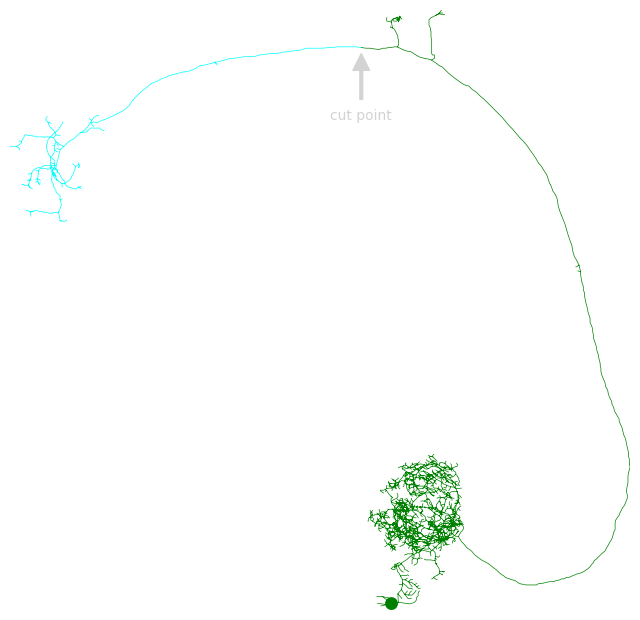

In [105]:
# Note that we are using method='2d' here because that makes annotating the plot easier
fig, ax = distal.plot2d(color='cyan', method='2d', view=('x', '-z'))
fig, ax = proximal.plot2d(color='green', ax=ax, method='2d', view=('x', '-z'))

# Annotate cut point
cut_coords = distal.nodes.set_index('node_id').loc[distal.root, ['x', 'z']].values[0]
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]),
            color='lightgrey',
            xytext=(cut_coords[0], -cut_coords[1]-2000), va='center', ha='center',
            arrowprops=dict(shrink=0.1, width=2, color='lightgrey'),
            )

plt.show()

In [28]:
node_id, dist = n.snap([14000, 16200, 12000])
print('Closest node:', node_id, 'at distance', dist)

Closest node: 334 at distance 70.71067811865476


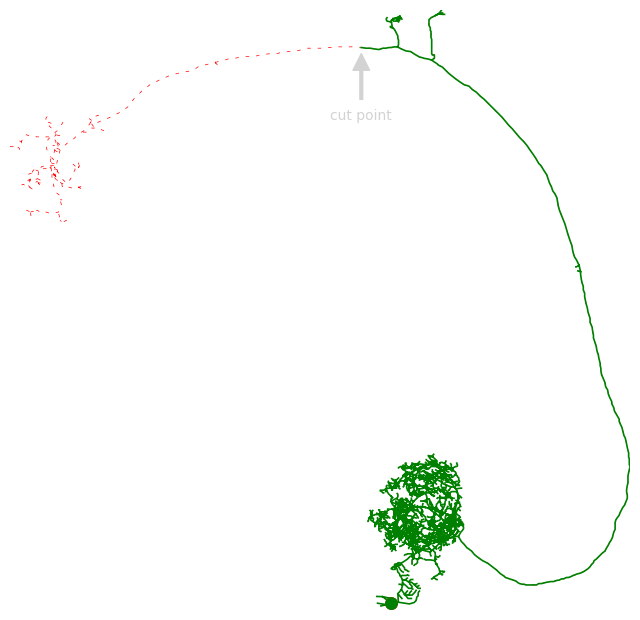

In [106]:
n_pruned = n.prune_distal_to(cut_node_id, inplace=False)

cut_coords = n.nodes.set_index('node_id').loc[cut_node_id, ['x', 'z']].values

# Plot original neuron in red and with dotted line
fig, ax = n.plot2d(color='red', method='2d', linestyle=(0, (5, 10)), view=('x', '-z'))

# Plot remaining neurites in red
fig, ax = n_pruned.plot2d(color='green', method='2d', ax=ax, view=('x', '-z'), lw=1.2)

# Annotate cut point
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]),
            color='lightgrey',
            xytext=(cut_coords[0], -cut_coords[1]-2000), va='center', ha='center',
            arrowprops=dict(shrink=0.1, width=2, color='lightgrey'),
            )

plt.show()

In [36]:
n = nl[0]
branch_points = n.nodes[n.nodes.type=='branch'].node_id.values

cut = navis.cut_skeleton(n, branch_points)
cut.head()

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,1734350788,1734350788,4,16,0,2,373.565735,None,8 nanometer
1,navis.TreeNeuron,1734350788,1734350788,5,10,0,2,431.518494,None,8 nanometer
2,navis.TreeNeuron,1734350788,1734350788,6,12,0,2,388.590637,None,8 nanometer
3,navis.TreeNeuron,1734350788,1734350788,8,22,0,2,665.534912,None,8 nanometer
4,navis.TreeNeuron,1734350788,1734350788,28,8,0,2,1534.385498,None,8 nanometer


Plot neurons:   0%|          | 0/600 [00:00<?, ?it/s]

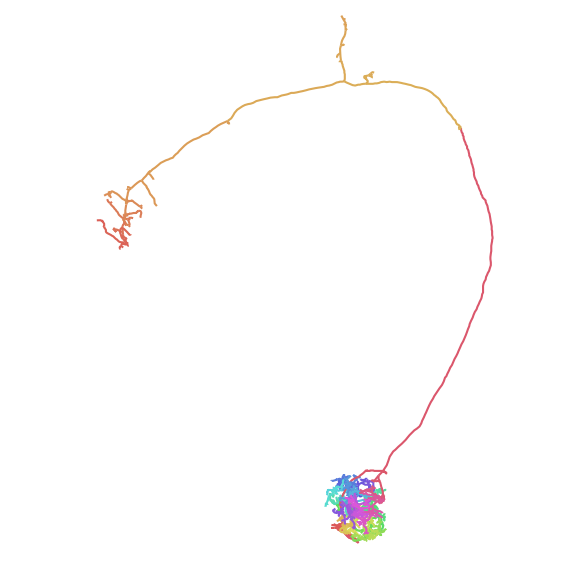

In [37]:
# Plot neuron fragments
fig, ax = navis.plot2d(cut, linewidth=1.5)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

prune_by_strahler:   0%|          | 0/5 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/5 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/5 [00:00<?, ?it/s]

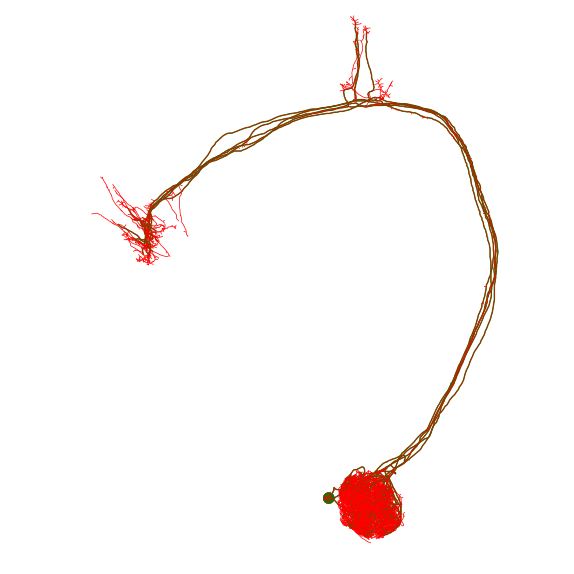

In [45]:
# This will prune off terminal branches (the lowest two Strahler indices)
nl_pruned = nl.prune_by_strahler(to_prune = [1, 2], inplace=False)

# Plot original neurons in red
fig, ax = nl.plot2d(color='red')

# Plot remaining neurites in green
fig, ax = nl_pruned.plot2d(color='green', ax=ax, linewidth=1)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

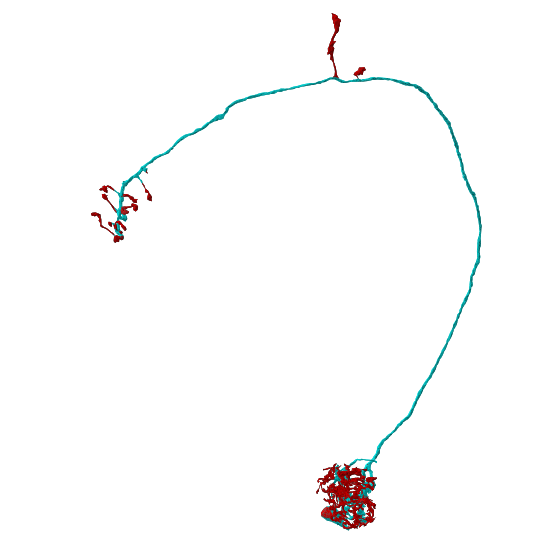

In [85]:
# Load an example mesh neuron
m = navis.example_neurons(1, kind='mesh')

# This will prune to the just terminal branches
m_pruned = navis.prune_by_strahler(m, to_prune=range(3, 100), inplace=False)

# Plot original neuron in cyan
fig, ax = m.plot2d(color='cyan', figsize=(10, 10))

# Plot remaining neurites red
fig, ax = m_pruned.plot2d(color='red', ax=ax)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

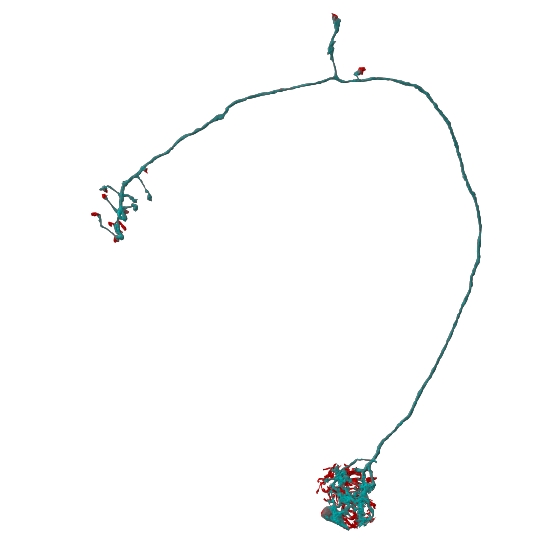

In [86]:
# This will prune all branches smaller than 10 microns
m_pruned = navis.prune_twigs(m, size='10 microns', inplace=False)

# Plot original neuron in red
fig, ax = m.plot2d(color='red', figsize=(10, 10))

# Plot remaining neurites in cyan
fig, ax = m_pruned.plot2d(color='cyan', ax=ax, linewidth=.75, alpha=.5)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

In [55]:
# Load an example navis.Volume
lh = navis.example_volume('LH')

# Prune by volume
m_lh = navis.in_volume(m, lh, inplace=False)
m_outside_lh = navis.in_volume(m, lh, mode='OUT', inplace=False)

Plot neurons:   0%|          | 0/2 [00:00<?, ?it/s]

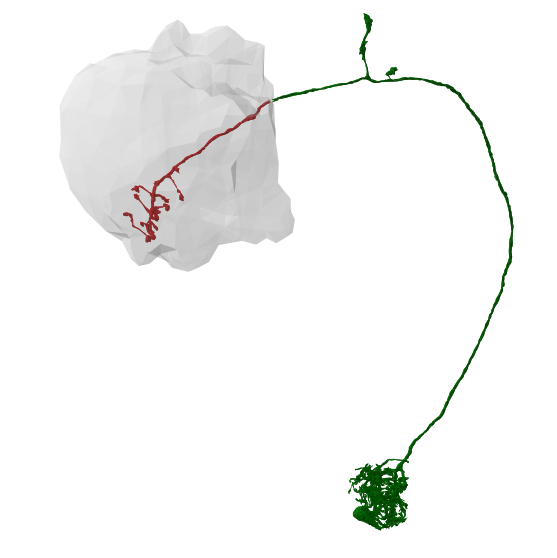

In [57]:
# Plot pruned branchs neuron in green
fig, ax = navis.plot2d([m_lh, m_outside_lh, lh], color=['red', 'green'], figsize=(10, 10))

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

In [88]:
# Get the connectors for one of our above skeletons
cn = sk.connectors

# Add a column that tells us which connectors are in the LH volume
cn['in_lh'] = navis.in_volume(cn[['x', 'y', 'z']].values, lh)
cn.head()

,connector_id,node_id,type,x,y,z,roi,confidence,in_lh
0,0,1436,pre,6444,21608,14516,LH(R),0.959,True
1,1,1436,pre,6457,21634,14474,LH(R),0.997,True
2,2,2638,pre,4728,23538,14179,LH(R),0.886,True
3,3,1441,pre,5296,22059,16048,LH(R),0.967,True
4,4,1872,pre,4838,23114,15146,LH(R),0.990,True


In [90]:
# Count the number of connectors (pre and post) in- and outside the LH:
cn.groupby(['type', 'in_lh']).size()

type  in_lh
post  False    1978
      True      106
pre   False     325
      True      296
dtype: int64